<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Customizing Colorbars](04.07-Customizing-Colorbars.ipynb) | [Contents](Index.ipynb) | [Text and Annotation](04.09-Text-and-Annotation.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.08-Multiple-Subplots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# 多重子圖表

子圖表:並排比較資料的不同視角，比較小的軸群組可以在單一圖表中同時存在，這些子圖表可以被插入圖表的網格或其他更複雜的排版中。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## ``plt.axes``: 手動建立子圖表

建立一個axes最基本的方法是使用``plt.axes``函式。預設的情況下這個建立的axes物件會填滿整張圖形。``plt.axes``可以傳入一個額外4個數字的list來表示圖中的座標系統。 

這些數字代表在此座標系統的``[left, bottom, width, height]``，範圍是從0表示圖的左下角到1所表示的右上角。

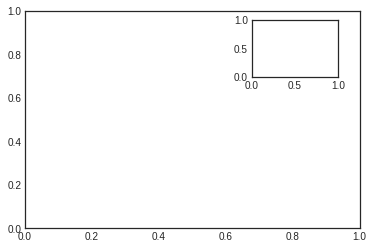

In [2]:
ax1 = plt.axes()  # 標準的axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2]) # 設定x和y的位置為65%，把x和y的長度為20%

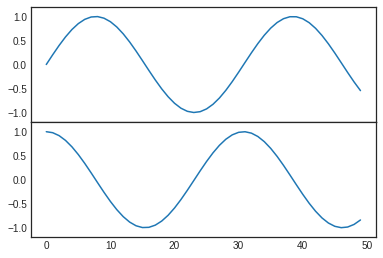

In [6]:
# 物件導向介面的等價命令是fig.add_axes(): [往左移, 往上移, 寬壓縮, 高壓縮]
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2)) # 上面的圖(x軸沒刻度標籤)
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2)) # 下面的圖(在位置0.5處)

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

## ``plt.subplot``: 子圖表的簡單網格

``plt.subplot()``使用對齊的的欄或列

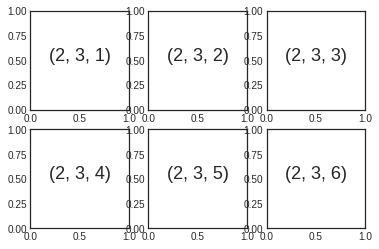

In [11]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), # 放置文字的座標
             fontsize=18, ha='center') # 圖片靠左中右:horizontalalignment

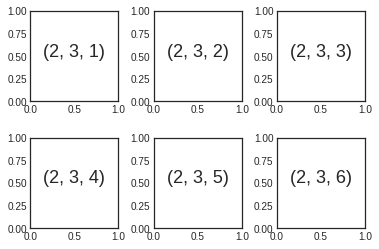

In [12]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4) # 調整子圖表間的高和寬的間隙的40%
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

## ``plt.subplots``: 一次準備好整個網格

``plt.subplots()``可用一行建立一個完整的子圖表網格，傳回值會放在Numpy的陣列中。

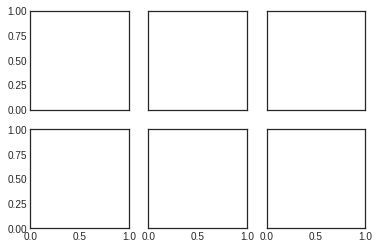

In [13]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row') # 共用x軸和y軸

透過指定``sharex``和``sharey``，已經自動地在格子中移除裡面的標籤。建立好的網格axes執行實例放在Numpy中回傳，可以方便用標準的陣列索引符號指定想要的軸。

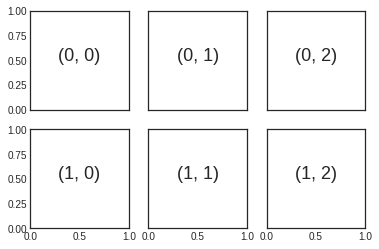

In [14]:
# axes是在一個二維陣列中，使用[row, col]進行索引
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

相較於``plt.subplot()``, ``plt.subplots()``更符合Python的以0為基底的索引慣例。